#TP4 - K plus proches voisins

Dans ce TP, nous allons implémenter un algorithme de k plus proche voisins avec une distance euclidienne.

Nous allons utiliser le dataset iris.
Comme nous l'avons vu en TP2, ce dataset est relativement simple, on s'attend donc à avoir de bonnes performances de l'algorithme KNN.

Nous étudierons par la suite l'influence du nombres de données sur les performances de l'agorithme.   

In [17]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier

## Dataset IRIS et split

Exécuter la cellule suivante pour loader l'ensemble de données iris.

In [3]:
iris = datasets.load_iris()
len(iris.target)

150

Reprenez le code de votre TP2 pour afficher  la *sepal length* en fonction de la *sepal width* en utilisant la fonction scatter de matplotlib (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Ajouter une couleur a chacun des points en fonction du label.

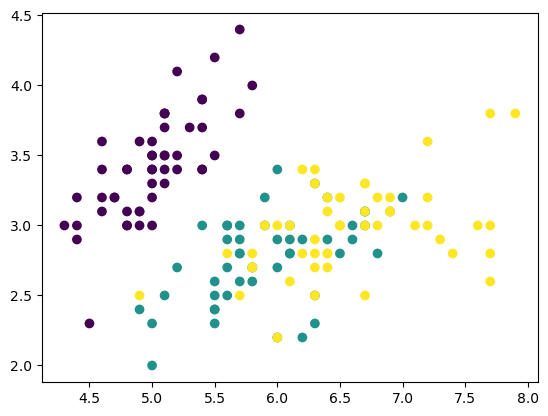

In [4]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)

Le dataset iris n'est pas divisé en ensemble d'entraînement et de test. Il va nous falloir réaliser ce split.

Pour réaliser ce split, il faut s'assurer d'équilibrer le train et le test set en classe. Par exemple, on peut choisir de répartir 20% des données dans le test set. Il faut alors faire attention a ne pas choisir les 20 premiers pourcents de données, mais plutôt de choisir 20% de la classe 0, 20 % de la classe 1 et ainsi de suite.


Donner l'expression permettant de récupérer tous les exemples de la classe 0 de la base de données.

In [5]:
classe0=[]
for i in range (len(iris.target)):
  if iris.target[i]==0:
    classe0.append(iris.data[i])


Ecrire une fonction split_classe prenant en paramètre un pourcentage, un ensemble de données et leur labels et renvoyant un split train/test aléatoire. On considère que l'ensemble de données fourni ne représente qu'une classe.

In [6]:
def split_classe(p,data,lab):
  testset=[]
  for i in range(int(len(data)*p/100)):
   testset.append(data[i])
  trainset=np.setdiff1d(iris.data,testset)


In [7]:
split_classe(20,iris.data,iris.target)

On a réalisé la fonction split_classe pour une seule classe, pour des soucis de simplicité.
Pour avoir le split définitf, nous allons utiliser la fonction train_test_split de sklearn.
Lisez la documentation de la fonction ici https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html et donner l'expression permettant de récupérer un train set et un test set du dataset iris, avec 20% des données dans la base de test.

Vous stockerez le resultat dans des variables data_train, data_test, label_train, label_test.


In [8]:
(train , test , trainlab , testlab)=train_test_split(iris.data,iris.target,train_size=0.8)

## KNN

Nous allons maintenant implémenter l'algorithme KNN.

On commence par implémenter la fonction distance, qui prend en paramètres deux exemples v1 et v2 de la base de données et qui calcule la distance entre ces deux exemples.
Donner le code de la fonction.
Choisissez deux exemples du dataset iris et tester la fonction. Verifiez que votre fonction est correcte en comparant votre résultat avec la fonction np.linalg.norm(v1-V2) de numpy.

In [9]:
def distance (v1,v2):
  d=0
  for i in range(len(v1)):
    d=d+(v1[i]-v2[i])**2
  dis=np.sqrt(d)
  return dis

In [10]:
distance(train[1],train[2])

0.8602325267042625

In [11]:
k=np.linalg.norm(train[1]-train[2])
print(k)

0.8602325267042624


Avant d'implémeter l'algorithme proprement dit, il nous faut implémenter une fonction de décision qui, à partir des labels des K plus proches voisins d'un exemple, renvoie la classe majoritaire parmis ceux ci.

Implémenter la fonction vote, prenant en paramètre un numpy array contenant des labels et le nombre de classe dans la base de données, et renvoyant la classe majoritaire parmis les labels.

In [12]:
def vote(labels,n):
  for i in range(n):
    counts = np.zeros(n)
    
    for label in labels:
        counts[int(label)] += 1
    
    # Trouver l'indice de la classe avec le maximum d'occurrences
    majority_class = np.argmax(counts)
    
    return majority_class


Tester votre fonction (ici, elle doit renvoyer 0).

In [13]:
liste_classe = np.array([0.0,0.0,0.0,1.0,2.0])
vote(liste_classe, 3)

0

On peut maintenant coder la fonction knn proprement dite.

On commence par coder une fonction predict, qui prend en paramètres le train set et ses labels, un exemple que l'on veut classifier (provenant du test set) et un nombre de voisins. Cette fonction renvoie la classe de l'exemple a calssifier en utilisant es fonction distance et vote que l'on a implémenté plus haut.

In [14]:
def predict(train, trainlab, test_instance, k):
    """
    Prédit la classe d'un exemple en utilisant l'algorithme KNN.

    :param train: Le jeu de données d'entraînement
    :param trainlab: Les labels du jeu de données d'entraînement
    :param test_instance: L'exemple à classer
    :param k: Le nombre de voisins à considérer
    :return: La classe prédite pour l'exemple
    """
    distances = []
    
    # Calculer la distance entre l'exemple de test et tous les exemples d'entraînement
    for i in range(len(train)):
        dist = distance(test_instance, train[i])  # Utiliser la fonction distance
        distances.append((dist, trainlab[i]))  # Stocker la distance et le label
    
    # Trier les distances et prendre les K plus proches
    distances.sort(key=lambda x: x[0])  # Trier par distance
    k_nearest_labels = [distances[i][1] for i in range(k)]  # Obtenir les labels des K voisins
    
    # Utiliser la fonction de vote pour déterminer la classe
    return vote(k_nearest_labels, len(np.unique(trainlab)))  # Passer le nombre de classes

Donner maintenant le code d'une fonction knn(data_train, label_train, data_test, k) qui appelle predict sur tous les exemples de data_test.
Cette fonction renvoie une liste de prédiction de l'algorithme.

In [15]:
def knn(data_train, label_train, data_test, k):
    # Créer un classificateur k-NN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Entraîner le classificateur sur les données d'entraînement
    knn_classifier.fit(data_train, label_train)
    
    # Prédire les étiquettes pour les données de test
    predictions = knn_classifier.predict(data_test)
    
    return predictions.tolist()  

Calculer les prédiction d'un algorithme de knn pour k=3 avec la base de test que vous avez extraite précedemment.

In [18]:
# Calculer les prédictions pour k=3
k = 3
predictions = knn(train, trainlab, test, k)

# Afficher les prédictions
print(predictions)


[2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1]


## Evaluation des performances

Il nous faut maintenant évaluer notre classifieur. Donner une fonction accuracy qui prend en paramètres une liste de label de la base de test et une liste de prédiction et qui calcule le nombre de bonnes classification en pourcentage.

Tester ensuite les performances de votre algorithme de knn.

In [19]:
def accuracy(true_labels, predicted_labels):
    correct_predictions = np.sum(true_labels == predicted_labels)
    return (correct_predictions / len(true_labels)) * 100

On veut maintenant étudier les performances de l'algorithmes en fonction du nombre de données de l'ensemble d'entrainement.

Donner le code permettant de calculer l'accuracy d'un algorithme de knn pour l = [3,10,25,50,75,100] données extraites de l'ensemble d'entrainement.




In [21]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Charger le jeu de données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Diviser le jeu de données en ensembles d'entraînement et de test
train, test, trainlab, testlab = train_test_split(X, y, train_size=0.8, random_state=42)

# Tailles d'échantillons
l = [3, 10, 25, 50, 75, 100]

# Calculer l'accuracy pour chaque taille d'échantillon
accuracies = {}
for sample_size in l:
    if sample_size > len(train):
        continue
    subset_train = train[:sample_size]
    subset_trainlab = trainlab[:sample_size]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(subset_train, subset_trainlab)
    predictions = knn_classifier.predict(test)
    
    acc = accuracy(testlab, predictions)
    accuracies[sample_size] = acc

print(accuracies)


{3: 33.33333333333333, 10: 63.33333333333333, 25: 96.66666666666667, 50: 96.66666666666667, 75: 96.66666666666667, 100: 100.0}


Afficher l'accuracy en fonction du nombre de données utilisé.

In [22]:
accuracies = []
for sample_size in l:
    if sample_size > len(train):
        continue
    subset_train = train[:sample_size]
    subset_trainlab = trainlab[:sample_size]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(subset_train, subset_trainlab)
    predictions = knn_classifier.predict(test)
    
    acc = accuracy(testlab, predictions)
    accuracies.append(acc)


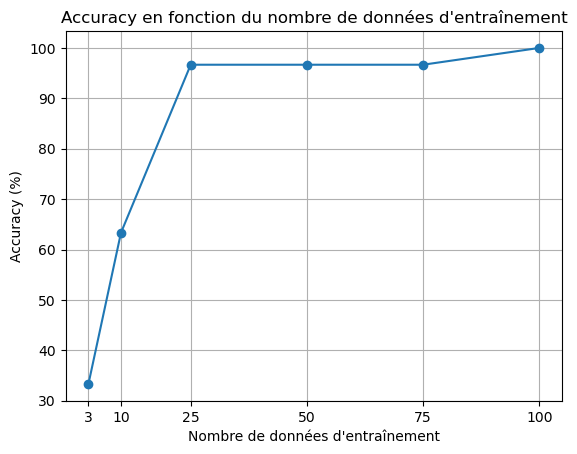

In [23]:
plt.plot(l, accuracies, marker='o')
plt.title('Accuracy en fonction du nombre de données d\'entraînement')
plt.xlabel('Nombre de données d\'entraînement')
plt.ylabel('Accuracy (%)')
plt.xticks(l)
plt.grid()
plt.show()

Qu'observe-t-on ?

Réponse :
Tendance à la hausse : L'accuracy augmente généralement avec plus de données d'entraînement.
Stabilité : Plus de données peuvent rendre l'accuracy plus stable.
Diminution des gains : Après un certain point, l'accuracy peut se stabiliser sans gains significatifs.
Variabilité : De petites tailles d'échantillons peuvent entraîner des fluctuations importantes de l'accuracy.
Limites d'échantillonnage : Des échantillons trop petits peuvent donner des résultats moins fiables.